Never used geopandas to make maps before. Lets see what this is like!

started going down this road after looking at this: https://michelleful.github.io/code-blog/2015/04/27/osm-data/

found some great datasets here: https://gisdata-njdep.opendata.arcgis.com/

In [1]:
import geopandas as gpd
import contextily as ctx

import matplotlib.pyplot as plt

In [3]:

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

In [ ]:
df = gpd.read_file(geopandas.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [ ]:
df = df.to_crs(epsg=3857)

In [ ]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=11, url=ctx.sources.ST_TONER_LITE)
ax.set_axis_off()

In [ ]:
gpd.datasets.available

In [2]:
# df = geopandas.read_file('../coastlines/new-york_new-york.geojsonl')
df = gpd.read_file('../coastlines/map.geojson')
# df = geopandas.read_file('../coastlines/open_street_map.geojson')

df.shape

df.plot()

DriverError: ../coastlines/map.geojson: No such file or directory

In [ ]:
# this is too much

# import json

# import shapely.geometry
# import geopandas_osm.osm

# with open('../coastlines/map.geojson') as f:
#     data = json.load(f)

# poly = shapely.geometry.shape(data['features'][0]['geometry'])
# df = geopandas_osm.osm.query_osm('way', poly, recurse='down', tags='highway')

# use shapefiles

These come from the NJDEP open data portal

In [3]:
map_df = gpd.read_file('../coastlines/Coastline_2012_of_New_Jersey/Coastline_2012_of_New_Jersey.shp')


(39.407994, 39.650555)

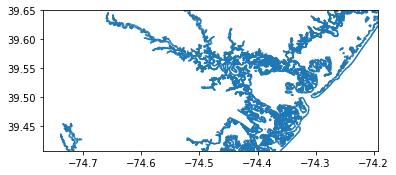

In [4]:
map_df.plot()

# raritan
# plt.xlim([-74.464228, -74.0])
# plt.ylim([40.409759, 40.6])

# mullaca
plt.xlim([-74.769887, -74.193105])
plt.ylim([39.407994, 39.650555])


In [20]:
counties_df = gpd.read_file('../coastlines/New_Jersey_Counties/New_Jersey_Counties.shp')

counties_df.head()

,OBJECTID,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,...,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,REGION,GLOBALID,Shape_Leng,Shape_Area,geometry
0,1,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,...,204615,450,414,451,335,COASTAL,{FF3231FE-B82C-4DCB-A36E-199C86B99D48},650228.153906,1.702385e+10,"POLYGON ((443056.0100605935 311529.7698822767,..."
1,2,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,...,849843,3774,3686,3459,3544,NORTHEASTERN,{08D52232-487C-40B1-AF3A-94DE390C8BDD},443326.122021,6.686010e+09,"POLYGON ((656200.9630349278 783614.3663936108,..."
2,3,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,...,362542,547,516,482,442,SOUTHERN,{5DB6BAA6-5945-4004-8837-ECE826970808},788906.717476,2.286903e+10,"POLYGON ((436626.6899140105 491361.7799681872,..."
3,4,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,...,471650,2257,2236,2340,2073,SOUTHERN,{944EE24D-97B4-4666-9963-FC6BAE3D9334},495010.034901,6.344511e+09,"POLYGON ((342763.9898445085 423475.8301104382,..."
4,5,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,...,82266,340,358,332,288,COASTAL,{72F314BF-ED7C-4C51-A7A0-E841972BC422},514564.858771,7.976962e+09,"POLYGON ((390389.7298946753 177065.1300194412,..."


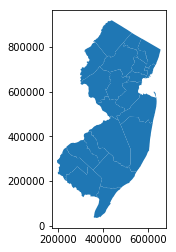

In [15]:
counties_df.plot()


(170515.9983667707, 680228.4248388322, -9284.430302347617, 963779.6277323102)

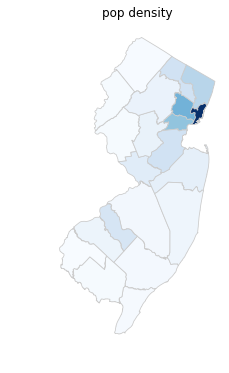

In [19]:
fig, ax = plt.subplots(1, figsize=(10, 6))

variable = 'POPDEN2010'

counties_df.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.title('pop density')

ax.axis('off')